In [1]:
#%reset
import pandas as pd
%pylab inline
import seaborn as sns
sns.set(style="darkgrid")

Populating the interactive namespace from numpy and matplotlib


# Load data

In [2]:
customers_data_ini = pd.read_csv(
    'customers_data.csv', decimal=',', index_col=0)

customers_data = customers_data_ini[
    [col for col in customers_data_ini.columns
     if col not in ['order_purchase_timestamp']]]

# Determine columns for clustering and intervals number

In [3]:
selected_columns = ['order_id', 'order_item_id', 'freight_value', 
                    'review_score', 'dist_to_seller', 'payment_value', 
                    'product_photos_qty', 'comment_propensity']

# Define intervals number
intervals_n = 6

# Clusters number analyze

In [4]:
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Create scaled dataframe
dataframe = customers_data[selected_columns][::10]
dataframe_scaled = preprocessing.StandardScaler().fit_transform(dataframe)
dataframe_scaled = pd.DataFrame(
    dataframe_scaled, columns=dataframe.columns)

#For-loop on kmeans clusters number and save silhouette score, 
# cluster size standard deviation and sum of square error
sse = []
silhouette = []
cluster_size_std = []
for clusters_n in range(2, 20):
    clusterer = KMeans(n_clusters=clusters_n).fit(dataframe_scaled)
    sse.append(clusterer.inertia_)
    silhouette.append(silhouette_score(dataframe_scaled, clusterer.labels_))
    cluster_size_std.append(
        std([sum(clusterer.labels_ == id) for id in set(clusterer.labels_)]))

# Use Knee Locator tool to find optimal clusters number
kl = KneeLocator(range(2, 20), sse, curve='convex', direction='decreasing')
clusters_n = kl.elbow

print('optimal clusters number is :', clusters_n)

optimal clusters number is : 7


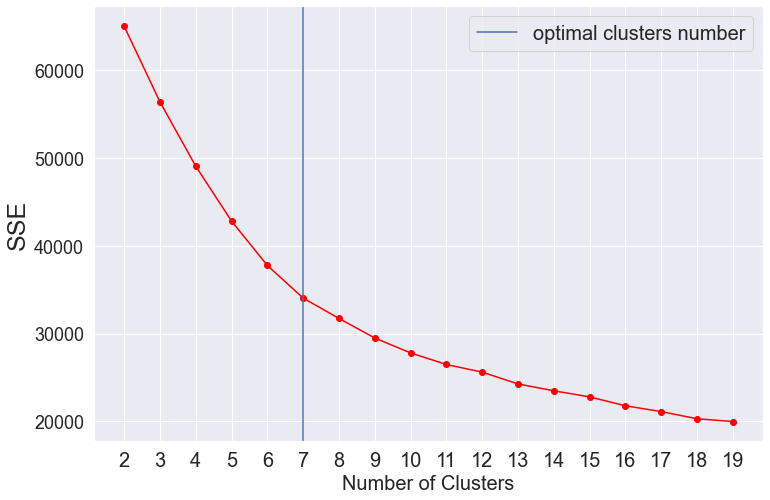

In [5]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# make a plot
ax.plot(range(2, 20), sse, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Number of Clusters", fontsize=20)
# set y-axis label
ax.set_ylabel("SSE", fontsize=25)
plt.xticks(range(2, 20), size=20)
plt.yticks(size=18)

plt.axvline(clusters_n, 0, 1e6, label='optimal clusters number')
plt.legend(fontsize=20)

plt.show()